k- Means Clustering:
    
Step - 1 = start with k centroids by putting them at random place for eg k = 3
step - 2 = compute distance of every point from centroid and cluster them accordingly
step - 3 = adjust centrods so thst thry become center of gravity for given cluster
step - 4 = again re- clusterevery point based on their distance with centroid
keep on repeating this process.

how to determine K..? use elbow method
SSE = sum of squared errors - for each of the cluster compute the error from idividusl data points to the centroid
after calucating square them and sum it up for each cluster now sum the sse of all clusters.
do the same method with k = 2,3,4,...
plot the graph - more number of clusters less error
in the graph fine the elbow point that is the good cluster number

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_csv(r"C:\Users\Bezawada\Downloads\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


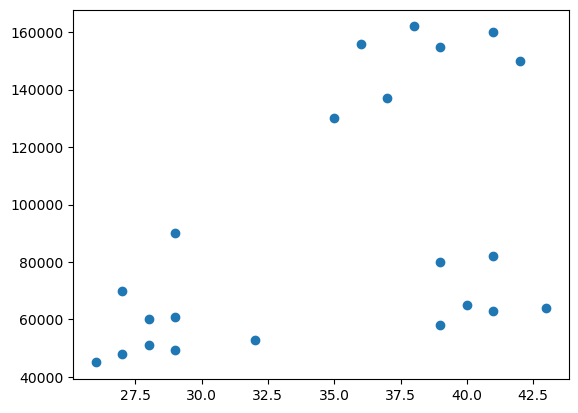

In [7]:
plt.scatter(df['Age'],df['Income($)'])

In [8]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\Bezawada\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [10]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


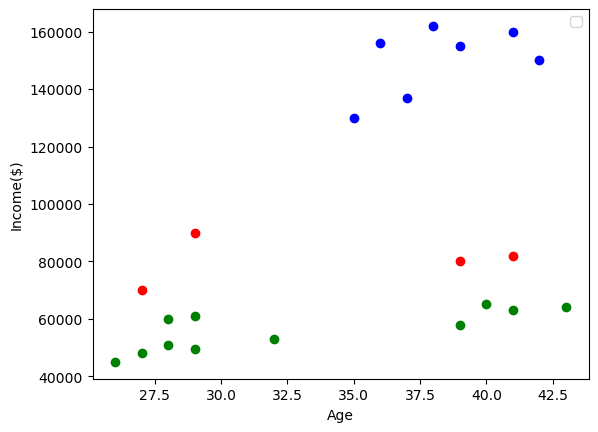

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color = 'green')
plt.scatter(df2['Age'],df2['Income($)'],color = 'blue')
plt.scatter(df3['Age'],df3['Income($)'],color = 'red')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [26]:
scaler = MinMaxScaler()
scaled_income = scaler.fit_transform(df['Income($)'].values.reshape(-1, 1))
df['Income($)'] = scaled_income
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [27]:
scaler = MinMaxScaler()
scaled_income = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df['Age'] = scaled_income
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [29]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\Bezawada\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [30]:
df['cluster_predicted'] = y_predicted
df

,Name,Age,Income($),cluster,cluster_predicted
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0
5,Gautam,0.764706,0.940171,1,0
6,David,0.882353,0.982906,1,0
7,Andrea,0.705882,1.000000,1,0
8,Brad,0.588235,0.948718,1,0
9,Angelina,0.529412,0.726496,1,0


In [31]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

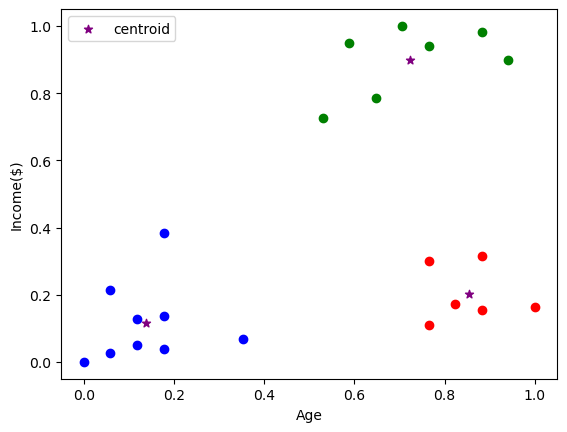

In [35]:
df1 = df[df.cluster_predicted==0]
df2 = df[df.cluster_predicted==1]
df3 = df[df.cluster_predicted==2]

plt.scatter(df1['Age'],df1['Income($)'],color = 'green')
plt.scatter(df2['Age'],df2['Income($)'],color = 'blue')
plt.scatter(df3['Age'],df3['Income($)'],color = 'red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple', marker = '*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [38]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters= k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)#givees u ssum of square error

C:\Users\Bezawada\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bezawada\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bezawada\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bezawada\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

In [39]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2766936276300278,
 0.2106667848801052,
 0.16858512236029757,
 0.13976844995388155,
 0.10383752586603559]

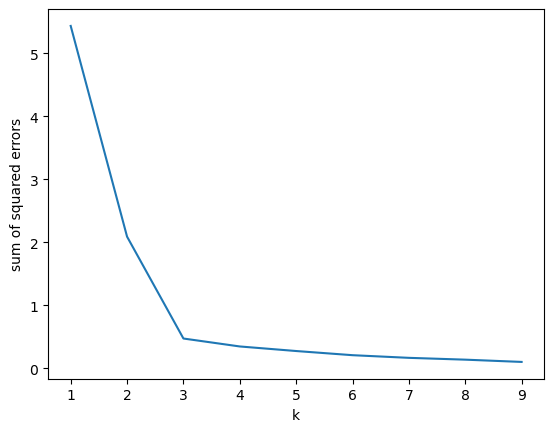

In [41]:
plt.xlabel('k')
plt.ylabel('sum of squared errors')
plt.plot(k_rng,sse)